In [1]:
import sys
sys.path.append("/Users/jameskitchens/Documents/GitHub/sparg2.0")

import sparg
import tskit
import msprime
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("always")
import importlib
importlib.reload(sparg)

<module 'sparg' from '/Users/jameskitchens/Documents/GitHub/sparg2.0/sparg/__init__.py'>

In [2]:
ts = tskit.load("args/simplified_args/rep1.trees")

In [3]:
output = sparg.estimate_spatial_parameters(ts=ts, verbose=True)

Prepared input parameters - Section Elapsed Time: 0.024211883544921875 - Total Elapsed Time: 0.024221181869506836


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13361/13361 [25:17<00:00,  8.81it/s]


Calculated covariance matrix - Section Elapsed Time: 1517.4409439563751 - Total Elapsed Time: 1517.4652771949768
Inverted covariance matrix - Section Elapsed Time: 34.347229957580566 - Total Elapsed Time: 1551.8127779960632
Created root locations vector - Section Elapsed Time: 0.9182248115539551 - Total Elapsed Time: 1552.7310881614685
Estimated dispersal rate - Section Elapsed Time: 0.0070648193359375 - Total Elapsed Time: 1552.7382221221924


In [4]:
node_locations = sparg.locate_nodes(ts=ts, spatial_parameters=output)

In [5]:
node_locations["error_0"] = node_locations["true_location_0"] - node_locations["estimated_location_0"]
node_locations["error_1"] = node_locations["true_location_1"] - node_locations["estimated_location_1"]

In [6]:
u_bounds = []
l_bounds = []
sigma = math.sqrt(output[0][0][0])
for t in range(0, int(max(node_locations["time"]))+1):
    u_bounds.append(sigma * math.sqrt(t))
    l_bounds.append(-1 * sigma * math.sqrt(t))

Text(0.5, 0, 'Generations In Past')

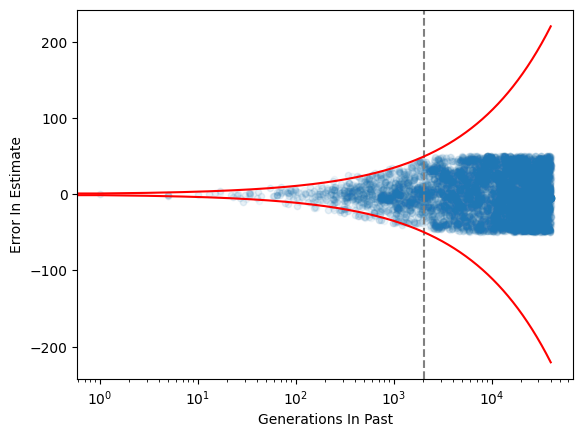

In [7]:
node_locations.plot.scatter("time", "error_0", alpha=0.05)
plt.axvline(x=2054, color="grey", linestyle="dashed")
plt.plot(range(0, int(max(node_locations["time"]))+1), u_bounds, "red")
plt.plot(range(0, int(max(node_locations["time"]))+1), l_bounds, "red")
plt.xscale("log")
plt.ylabel("Error In Estimate")
plt.xlabel("Generations In Past")

Text(0.5, 0, 'Generations In Past')

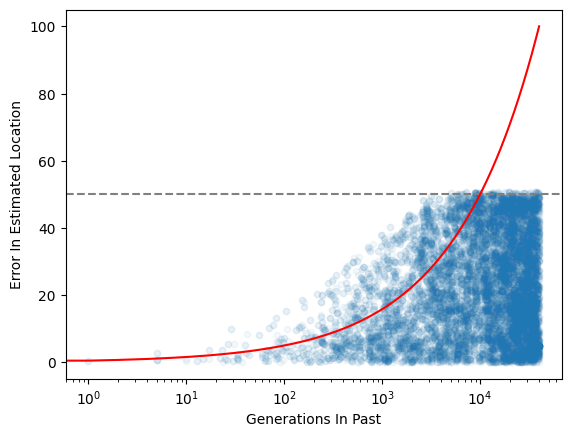

In [14]:
node_locations["abs_error_0"] = abs(node_locations["error_0"])
node_locations.plot.scatter("time", "abs_error_0", alpha=0.05)
plt.axhline(y=50, color="grey", linestyle="dashed")
plt.plot(range(0, int(max(node_locations["time"]))+1), u_bounds, "red")
plt.xscale("log")
plt.ylabel("Error In Estimated Location")
plt.xlabel("Generations In Past")

1.2175757322028948

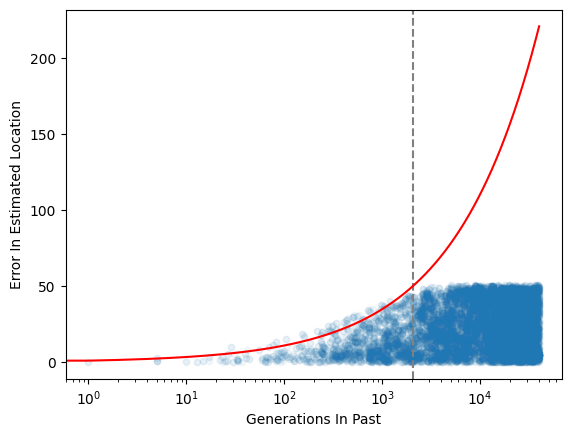

In [13]:
node_locations.plot.scatter("time", "abs_error_0", alpha=0.05)
plt.axvline(x=2054, color="grey", linestyle="dashed")
plt.plot(range(0, int(max(node_locations["time"]))+1), u_bounds, "red")
plt.xscale("log")
plt.ylabel("Error In Estimated Location")
plt.xlabel("Generations In Past")
plt.savefig("accuracy.pdf")

In [17]:
u_bounds = []
l_bounds = []
sigma = math.sqrt(0.75)
for t in range(0, int(max(node_locations["time"]))+1):
    u_bounds.append(sigma * math.sqrt(t))
    l_bounds.append(-1 * sigma * math.sqrt(t))

u_2_bounds = []
l_2_bounds = []
sigma = math.sqrt(0.75)
for t in range(0, int(max(node_locations["time"]))+1):
    u_2_bounds.append(2 * sigma * math.sqrt(t))
    l_2_bounds.append(-2 * sigma * math.sqrt(t))

Text(0.5, 0, 'Generations In Past')

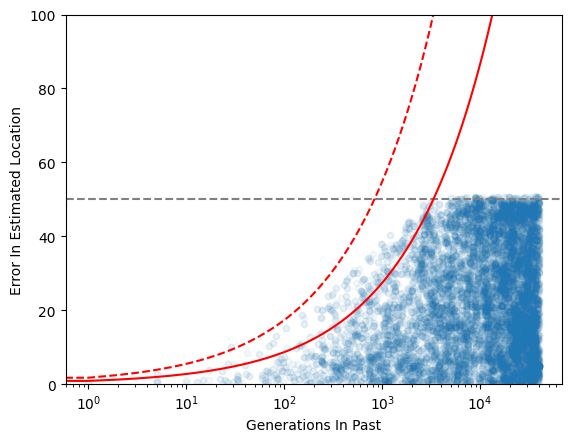

In [21]:
node_locations["abs_error_0"] = abs(node_locations["error_0"])
node_locations.plot.scatter("time", "abs_error_0", alpha=0.05)
plt.axhline(y=50, color="grey", linestyle="dashed")
plt.plot(range(0, int(max(node_locations["time"]))+1), u_bounds, "red")
plt.plot(range(0, int(max(node_locations["time"]))+1), u_2_bounds, "red", linestyle="dashed")
plt.xscale("log")
plt.ylim(0,100)
plt.ylabel("Error In Estimated Location")
plt.xlabel("Generations In Past")

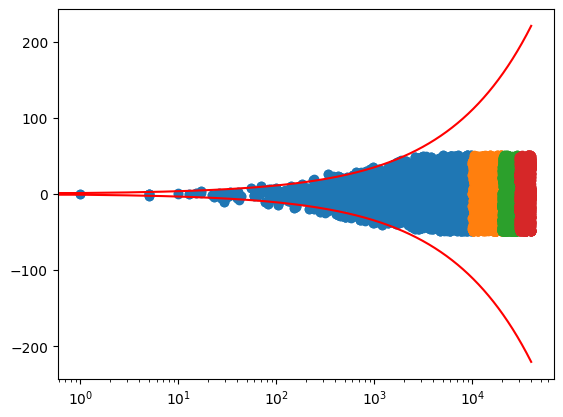

In [96]:
time_0 = node_locations[node_locations["time"]<=10000]
time_1 = node_locations[(node_locations["time"]>10000)&(node_locations["time"]<=20000)]
time_2 = node_locations[(node_locations["time"]>20000)&(node_locations["time"]<=30000)]
time_3 = node_locations[(node_locations["time"]>30000)&(node_locations["time"]<=40000)]
plt.scatter(time_0["time"], time_0["error_0"])
plt.scatter(time_1["time"], time_1["error_0"])
plt.scatter(time_2["time"], time_2["error_0"])
plt.scatter(time_3["time"], time_3["error_0"])
plt.plot(range(0, int(max(node_locations["time"]))+1), u_bounds, "red")
plt.plot(range(0, int(max(node_locations["time"]))+1), l_bounds, "red")
plt.xscale("log")

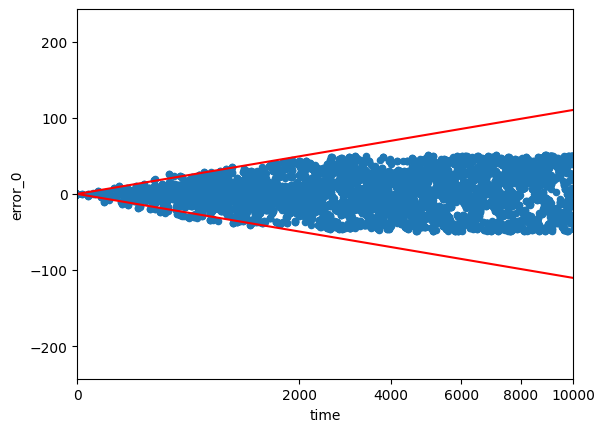

In [100]:
import matplotlib.scale as mscale
import matplotlib.transforms as mtransforms
import matplotlib.ticker as ticker

class SquareRootScale(mscale.ScaleBase):
    """
    ScaleBase class for generating square root scale.
    """
 
    name = 'squareroot'
 
    def __init__(self, axis, **kwargs):
        # note in older versions of matplotlib (<3.1), this worked fine.
        # mscale.ScaleBase.__init__(self)

        # In newer versions (>=3.1), you also need to pass in `axis` as an arg
        mscale.ScaleBase.__init__(self, axis)
 
    def set_default_locators_and_formatters(self, axis):
        axis.set_major_locator(ticker.AutoLocator())
        axis.set_major_formatter(ticker.ScalarFormatter())
        axis.set_minor_locator(ticker.NullLocator())
        axis.set_minor_formatter(ticker.NullFormatter())
 
    def limit_range_for_scale(self, vmin, vmax, minpos):
        return  max(0., vmin), vmax
 
    class SquareRootTransform(mtransforms.Transform):
        input_dims = 1
        output_dims = 1
        is_separable = True
 
        def transform_non_affine(self, a): 
            return np.array(a)**0.5
 
        def inverted(self):
            return SquareRootScale.InvertedSquareRootTransform()
 
    class InvertedSquareRootTransform(mtransforms.Transform):
        input_dims = 1
        output_dims = 1
        is_separable = True
 
        def transform(self, a):
            return np.array(a)**2
 
        def inverted(self):
            return SquareRootScale.SquareRootTransform()
 
    def get_transform(self):
        return self.SquareRootTransform()
 
mscale.register_scale(SquareRootScale)

node_locations.plot.scatter("time", "error_0")
plt.plot(range(0, int(max(node_locations["time"]))+1), u_bounds, "red")
plt.plot(range(0, int(max(node_locations["time"]))+1), l_bounds, "red")
plt.xlim(0,10000)
plt.xscale("squareroot")

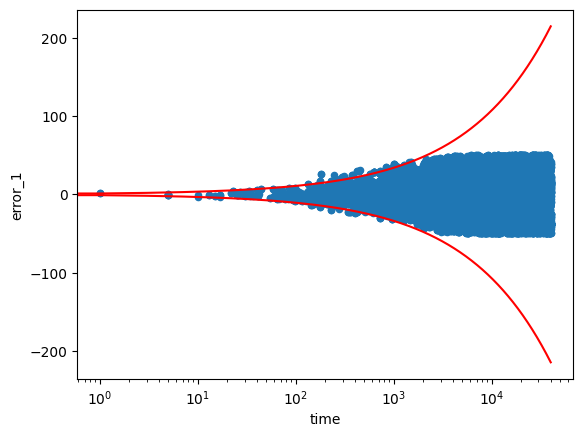

In [67]:
u_bounds = []
l_bounds = []
sigma = math.sqrt(output[0][1][1])
for t in range(0, int(max(node_locations["time"]))+1):
    u_bounds.append(sigma * math.sqrt(t))
    l_bounds.append(-1 * sigma * math.sqrt(t))

node_locations.plot.scatter("time", "error_1")
plt.plot(range(0, int(max(node_locations["time"]))+1), u_bounds, "red")
plt.plot(range(0, int(max(node_locations["time"]))+1), l_bounds, "red")
plt.xscale("log")

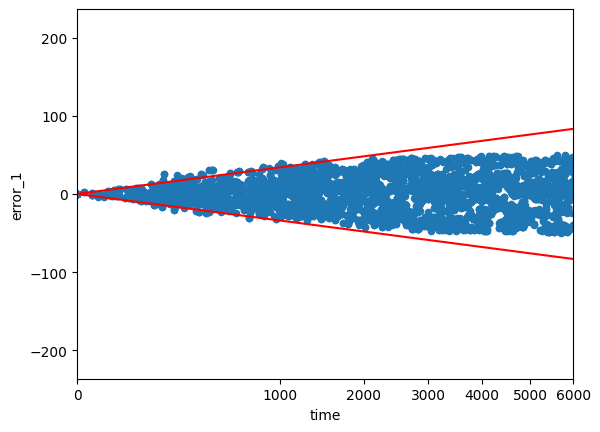

In [69]:
node_locations.plot.scatter("time", "error_1")
plt.plot(range(0, int(max(node_locations["time"]))+1), u_bounds, "red")
plt.plot(range(0, int(max(node_locations["time"]))+1), l_bounds, "red")
plt.xlim(0,6000)
plt.xscale("squareroot")

In [67]:
def create_ancestors_dataframe(ts, samples, timestep=1, include_locations=False, dimensions=2):
    """Creates a pandas.DataFrame with each row corresponding to an ancestor of a sample

    Each ancestor is at a specific time in the past and corresponds to a region of the chromosome.

    TODO: Test in cases where include_locations=True, but there aren't locations in the TreeSequence
    TODO: Check what happens when a non-sample node is passed into samples list

    Parameters
    ----------
    ts : tskit.TreeSequence
    samples : list
        List of sample node IDs
    timestep : int
        Determines how often ancestors are measured. 
    include_locations : boolean
        Whether to include columns for the true ancestor locations. Default is False.

    Returns
    -------
    df : pandas.DataFrame
        Each row in the DataFrame corrsponds with a sample's ancestor
    """

    sample = []
    interval_left = []
    interval_right = []
    time = []
    location = []
    for node in samples:
        just_node, map = ts.simplify(samples=[node], map_nodes=True, keep_input_roots=False, keep_unary=True, update_sample_flags=False)
        for tree in just_node.trees():
            path = [0] + list(sparg.ancestors(tree, 0))
            for i,n in enumerate(path):
                path[i] = np.argwhere(map==n)[0][0]
            for i,n in enumerate(path):
                node_time = ts.node(n).time
                if node_time % timestep == 0:
                    sample.append(node)
                    interval_left.append(tree.interval.left)
                    interval_right.append(tree.interval.right)
                    time.append(node_time)
                    indiv = ts.node(n).individual
                    if indiv != -1:
                        location.append(ts.individual(indiv).location[:dimensions])
                    else:
                        location.append([None for d in range(dimensions)])
    df = pd.DataFrame({
        "sample":sample,
        "interval_left":interval_left,
        "interval_right":interval_right,
        "time":time,
    })
    if include_locations:
        locs = pd.DataFrame(location, columns=["true_location_"+str(d) for d in range(dimensions)])
        df = pd.concat([df, locs], axis=1)
    return df


def locate_internal_nodes(ts, spatial_parameters):
    pass

def create_nodes_dataframe(ts=ts, include_locations=False, dimensions=2):
    sample = []
    interval_left = []
    interval_right = []
    time = []
    location = []
    edges = ts.tables.edges
    for node in ts.nodes():
        sample.append(node.id)
        row = edges[np.where((edges.child==node.id)|(edges.parent==node.id))[0]][0]
        interval_left.append(row.left)
        interval_right.append(row.right)
        time.append(node.time)
        indiv = node.individual
        if indiv != -1:
            location.append(ts.individual(indiv).location[:dimensions])
        else:
            location.append([None for d in range(dimensions)])
    df = pd.DataFrame({
        "sample":sample,
        "interval_left":interval_left,
        "interval_right":interval_right,
        "time":time,
    })
    if include_locations:
        locs = pd.DataFrame(location, columns=["true_location_"+str(d) for d in range(dimensions)])
        df = pd.concat([df, locs], axis=1)
    return df


locations_df = create_nodes_dataframe(ts=ts, include_locations=True).head(10)

In [68]:
locations_df = pd.concat([locations_df, locations_df.apply(sparg.estimate_location, axis=1, ts=ts, spatial_parameters=output)], axis=1)

In [71]:
def estimate_node_locations(ts, spatial_parameters):
    node_paths = spatial_parameters[9]
    node_shared_times = spatial_parameters[8]
    inverted_cov_mat = spatial_parameters[3]
    for i,node in node_paths:
        estimate_location_and_variance(
            sigma_squared=spatial_parameters[0],
            s_a=spatial_parameters[8][i],
            inverted_cov_mat=spatial_parameters[3],
            sample_locs_to_root_locs=spatial_parameters[6],
            u_a=spatial_parameters[7],
            t_a=ts.max_root_time-ts.node(i).time
            
        

estimate_node_locations(spatial_parameters=output)

# Coverage

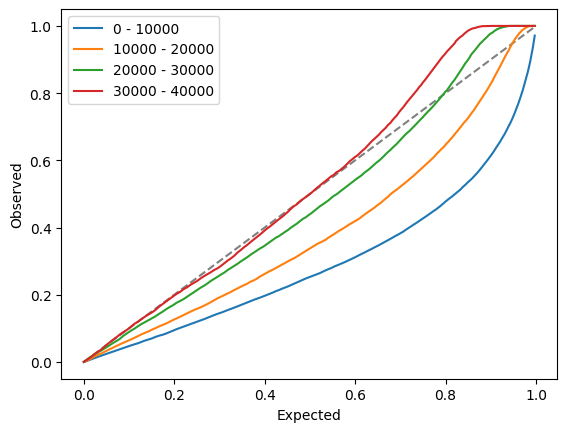

In [12]:
import scipy.stats as st

expected_zs = []
expected_percent_within = []
for i in range(0,300):
    value = st.norm.cdf(i/100)
    expected_zs.append(i/100)
    expected_percent_within.append(value - (1-value))


coverage = pd.read_csv("coverage_labmeeting_today.csv")


plt.plot(expected_percent_within, expected_percent_within, color="gray", linestyle='dashed')

step = 10000
for c in range(0,40000,step):#["epoch_low"].unique():
    percent_within = []
    in_epoch = coverage[(coverage["epoch_low"]>c) & (coverage["epoch_low"]<=c+step)]
    for i in coverage["num_std"].unique():
        filtered = in_epoch[in_epoch["num_std"]==i]
        percent_within.append(filtered["within"].sum()/filtered["total"].sum())
    if len(in_epoch.index) > 0:
        plt.plot(expected_percent_within, percent_within, label=str(c) + " - " + str(c+step))

plt.legend()
plt.xlabel("Expected")
plt.ylabel("Observed")
plt.savefig("coverage.svg")